## K - Nearest Neighbours

k Nearest Neighbours algorithm (k-NN) is to find the nearest k neighbours then classified the new data which category it belongs. `k` can be specified by users. The classification is done based on finding the class that the most nearest neighbours are in. 

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [3]:
# read in data from sample file
df = pd.read_csv('K-NN_Weight.csv')
df.head() # show the first five rows

,Height,Age,Weight
0,5.0,45,76
1,5.2,26,50
2,5.6,28,55
3,6.0,34,58
4,4.9,40,71


In [4]:
# we need to categorize the data by their Weight
# we will arbitrarily label every data with weight less than 50 as 0, 
# any data with weight less than 60 as 1
# any data with weight larger than 60 as 2

# make a copy of the dataframe
df_cat = df
# categorize by their weight
df_cat.loc[df['Weight']< 50, 'Weight'] = 0
df_cat.loc[(df['Weight'] >= 50) & (df['Weight'] < 65), 'Weight'] = 1
df_cat.loc[df['Weight'] >= 65, 'Weight'] = 2
df_cat

,Height,Age,Weight
0,5.0,45,2
1,5.2,26,1
2,5.6,28,1
3,6.0,34,1
4,4.9,40,2
5,5.8,36,1
6,5.2,19,0
7,5.8,29,1
8,5.5,24,0
9,5.7,31,1


# Visualize the Data

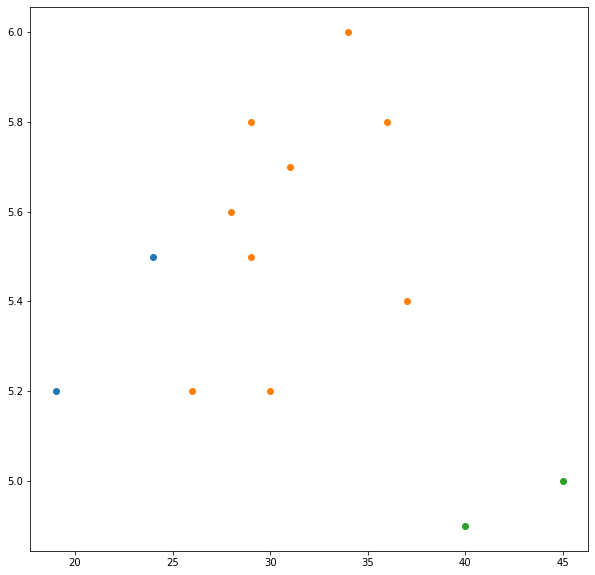

In [5]:
fig, ax = plt.subplots(figsize = (10,10))
df_zero = df_cat.loc[df_cat['Weight'] == 0]
df_one = df_cat.loc[df_cat['Weight'] == 1]
df_two = df_cat.loc[df_cat['Weight'] == 2]
ax.scatter(df_zero['Age'], df_zero['Height'])
ax.scatter(df_one['Age'], df_one['Height'])
ax.scatter(df_two['Age'], df_two['Height'])
#plt.ylim(4, 7)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X = df_cat.iloc[:, 0:2]
y = df_cat['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [7]:
X_train.head()
y_train

5     1
2     1
1     1
12    1
4     2
7     1
10    1
3     1
6     0
Name: Weight, dtype: int64

### Understand the data

(we can imagine that the data set means the machine parts selected are being examined by their dimensions
In our sample data set, `qualified` column is the category that each entry is in
each entry has two features: `length` and `width`
We want to classify new data according to its length and width

### Train Model

In [9]:
# import the model from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# we choose k = 3 here, due to the small number of data we have
# there isn't a k suitable for all. Generally we want to choose a small odd number.
# large k is generally more costy
knn_model = KNeighborsClassifier(n_neighbors = 3) 

knn_model.fit(X_train, y_train) # train our model to the data set we have. The training set is all the data points

KNeighborsClassifier(n_neighbors=3)

# Evaluate the model

In [9]:
y_pred = knn_model.predict(X_test)
y_pred

array([1, 1, 1, 1], dtype=int64)

In [10]:
y_test

11    1
9     1
0     2
8     0
Name: Weight, dtype: int64

In [11]:
accuracy_score(y_test, y_pred)

0.5

### Predict Some Value

Now we can predict the category of new data

In [12]:
knn_model.predict([(5.5, 30)])

array([1], dtype=int64)

The result from model predicting data with Height = 5.5 Age = 30 is the 1, which means the weight is between 50 and 65